# PCA - Principal Component Analysis

In [1]:
#Cuidado ao rodar o código inteiro! Utilizou-se RF e o código fica grande rapidamente!
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#criando o DataFrame "df_chem"
df = pd.read_csv("Minerals_Database3.csv")  # Importação do dataset para ser utilizado como dataframe
# Remoção de colunas não necessárias para o dataframe

df = df.drop(['A'], axis=1)
df = df.drop(['Name'], axis=1)

dados_cat = df.reindex(df.columns[[0,2,4]], axis = 1) # Remoção de dados categóricos
dados_categoricos = dados_cat.astype("category") # Tratamento de dados para o tipo categórico
newlist = [x for x in range(7,135)] # Range para pegarmos dados que estão em porcentagem
porcent_df = df.reindex(df.columns[newlist], axis = 1) # Coleta dos dados de elementos em porcentagem
df_chem = df.reindex(df.columns[[1,3,5,135,136,137]], axis=1) # Reindexação de um dataframe contendo apenas propriedades fisico-químicas
df_chem
df_chem, dados_categoricos

df_remove=df_chem.loc[(df_chem["Refractive Index"] == 0.000)] #remove as linhas (objetos), cujo valor do índice de refração é 0

df_chem = df_chem.drop(df_remove.index) #considera que o dataframe df_chem é o dataframe com as linhas removidas
print(df_chem)

     Mohs Hardness  Specific Gravity  Refractive Index  Molar Mass  \
0             4.50             3.240             1.580  817.339002   
1             2.75             3.446             1.592  435.069330   
2             2.00             4.420             2.085  921.092220   
4             5.50             1.050             1.634  861.185368   
5             3.50             3.295             1.457  225.618151   
..             ...               ...               ...         ...   
803           7.50             4.650             1.928  526.041800   
805           6.50             3.230             1.702  379.378178   
806           3.50             2.180             1.590  492.887716   
807           7.00             3.411             1.596  263.580584   
808           0.00             3.146             1.633  576.801907   

     Molar Volume  Calculated Density  
0        0.123390               5.498  
1        0.056083               6.439  
2        0.122631               6.234  

In [2]:
nome = 'df_chem' #escolha do dataset
atributos = ["Specific Gravity", "Mohs Hardness", 'Molar Mass', 'Molar Volume', 'Calculated Density'] #atributos
#target = ["Refractive Index"] comentado pois é não supervisionado
df_chem_r = df_chem.reindex(atributos, axis=1) #df_chem reindexado

In [3]:
print(df_chem_r)

     Specific Gravity  Mohs Hardness  Molar Mass  Molar Volume  \
0               3.240           4.50  817.339002      0.123390   
1               3.446           2.75  435.069330      0.056083   
2               4.420           2.00  921.092220      0.122631   
4               1.050           5.50  861.185368      0.112074   
5               3.295           3.50  225.618151      0.044887   
..                ...            ...         ...           ...   
803             4.650           7.50  526.041800      0.078468   
805             3.230           6.50  379.378178      0.100890   
806             2.180           3.50  492.887716      0.078566   
807             3.411           7.00  263.580584      0.089458   
808             3.146           0.00  576.801907      0.078605   

     Calculated Density  
0                 5.498  
1                 6.439  
2                 6.234  
4                 6.378  
5                 4.172  
..                  ...  
803               5.564  

#### DataFrame fit normalização

In [4]:
sc = StandardScaler()
sc.fit(df_chem_r) #fit
df_chem_norma = sc.transform(df_chem_r) #normalização

#### DataFrame fit PCA

In [5]:
pca = PCA()
pca.fit(df_chem_norma) #fit
df_chem_pca = pca.transform(df_chem_norma) #aplicação do PCA

#### Gráfico de PCA do DataFrame normalizado

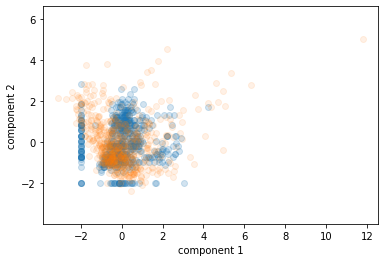

In [6]:
#X_new = pca.inverse_transform(X_pca)
plt.scatter(df_chem_norma[:, 0], df_chem_norma[:, 1], alpha=0.2)
#plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.1)
plt.scatter(df_chem_pca[:, 0], df_chem_pca[:, 1], alpha=0.1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal');

#### Grafico PCA colorido

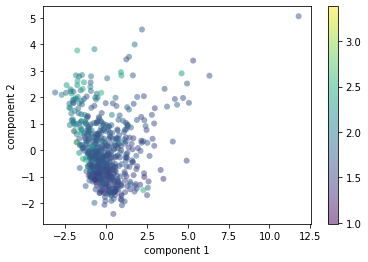

In [7]:
plt.scatter(df_chem_pca[:, 0], df_chem_pca[:, 1], edgecolor='none', alpha=0.5, c=df_chem["Refractive Index"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

#### Grafico PCA colorido 3D

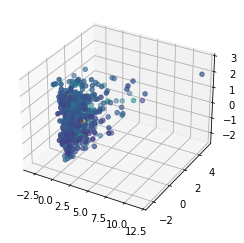

In [8]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_chem_pca[:, 0], df_chem_pca[:, 1], df_chem_pca[:, 2], c=df_chem["Refractive Index"].values)

#### Componentes principais do sistema: Matriz de loadings

In [9]:
component_names = [f"PC{i+1}" for i in range(df_chem_pca.shape[1])]
df_chem_pca = pd.DataFrame(df_chem_pca, columns=component_names)
df_chem_pca.head()

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=df_chem_r.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5
Specific Gravity,-0.365735,0.515274,-0.046669,-0.771311,-0.060263
Mohs Hardness,-0.179608,0.002564,0.982737,0.024536,0.036875
Molar Mass,0.537014,0.523052,0.117241,0.137440,-0.636708
Molar Volume,0.679173,0.147872,0.106238,-0.280728,0.653271
Calculated Density,-0.290377,0.662598,-0.083769,0.553877,0.403545


#### Gráfico de Variância dos Dados

array([<AxesSubplot:title={'center':'Variancia explicada'}, xlabel='Componente'>,
       <AxesSubplot:title={'center':'Variância acumulada'}, xlabel='Componente'>],
      dtype=object)

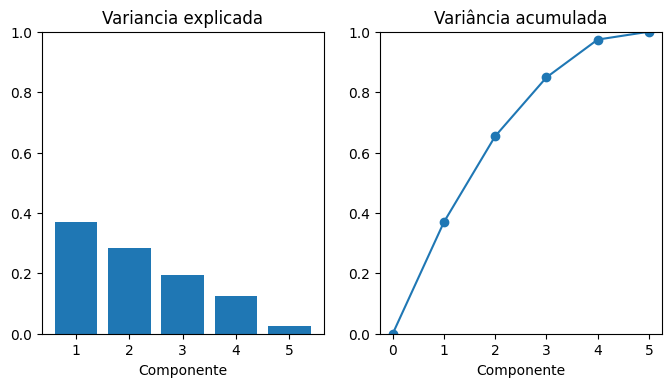

In [10]:
def plot_variance(pca, width=8, dpi=100):
    # Criar figura
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    # Fazer o cálculo da variância explicada
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componente", 
        title="Variancia explicada", 
        ylim=(0.0, 1.0)
    )
    
    # Variância acumulada
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componente", 
        title="Variância acumulada", 
        ylim=(0.0, 1.0)
    )
    
    # Detalhes da figura
    fig.set(figwidth=8, dpi=100)
    return axs

# Graficar
plot_variance(pca)


#### Componentes Importantes do Sistema:

É interessante utilizar até o PC3. Analisando o gráfico de variância acumulada, nota-se que a partir do PC3, não há um ganho significativo de dados (em até PC3 tem-se valor acumulado próximo de 100% dos dados) e sabendo que uma dimensão extra custa poder computacional, é interessante pegar apenas até PC3.

### Utilização dos componentes para Regressão

#### Regressão: Random Forest

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #Definindo o normalizador
df_chem_normal = scaler.fit_transform(df_chem_r[atributos].values) #Normalizando

#### Dataframe com dados normalizados pelo método MinMaxValue

In [12]:
df_scaled = pd.DataFrame(df_chem_normal,columns = atributos) #Criando o DataFrame a partir com dados normalizados, que é um array de numpy
df_scaled = pd.concat([df_scaled,pd.Series(df_chem['Refractive Index']).reset_index(drop=True)],axis=1) #Concatenando a coluna 'price' ao DataFrame
#print(df_scaled.head(10)) #Exibindo as 10 primeiras linhas do dataset normalizado

#### Criando o PCA para Regressão:

In [13]:
X = df_scaled[atributos] #Definindo o X como as features
y = df_scaled['Refractive Index']  #Definindo o y como o target

pca_r = PCA(n_components=3) #Calculando o PCA para três componentes
pca_r.fit(X)                #Ajustando o PCA
chem_pca = pca_r.transform(X)  #Realizando o PCA

In [14]:
print(np.sum(pca_r.explained_variance_ratio_))

0.8717890995426696


**A Variância explicada com 3 componentes é muito alta (87.1%), será necessário realizar uma divisão entre dados de treino e dados de teste**

In [15]:
X_train, X_test, y_train, y_test = train_test_split( #Chamando a função train_test_split, atribuindo os valores nas variáveis a esquerda da igualdade
    chem_pca,                                           #Dados das componentes principais do PCA
    y,                                               #Dados do target
    test_size=0.25,                                   #Tamanho do conjunto de teste
    random_state=2480)

#### Criação do Dataset PCA para visualização:

In [16]:
df_pca_train = pd.DataFrame(chem_pca,columns=['PC1', 'PC2', 'PC3']) #Define as colunas das PC em um dataframe, utilizando os dados do X_pca
df_pca_train['Refractive Index'] = y                                        #Adiciona a coluna preço, com os dados de y
print(df_pca_train.head(10))                                     #Exibe as 10 primeiras linhas do dataset
corrmat = df_pca_train.corr()                                    #Cálculo da correlação
print(round(corrmat,3))                                          #Exibe a correlação com 4 casas decimais

        PC1       PC2       PC3  Refractive Index
0  0.071974  0.037649  0.071719             1.580
1  0.093491 -0.147045 -0.013373             1.592
2  0.108648 -0.240586 -0.003879             2.085
3  0.045726  0.137797  0.256753             1.634
4 -0.035170 -0.019845 -0.087103             1.457
5  0.010038 -0.027067 -0.155410             1.742
6 -0.444826 -0.045373  0.134249             1.473
7  0.026417  0.238600 -0.095263             1.776
8  0.036042  0.150692  0.079652             1.829
9 -0.055780 -0.089631  0.067823             3.383
                    PC1    PC2    PC3  Refractive Index
PC1               1.000  0.000 -0.000             0.498
PC2               0.000  1.000 -0.000            -0.039
PC3              -0.000 -0.000  1.000            -0.198
Refractive Index  0.498 -0.039 -0.198             1.000


#### Treino com o Modelo de Florestas Aleatórias:

In [17]:
from sklearn.ensemble import RandomForestRegressor

# cria o modelo
SEMENTE_ALEATORIA = 1024
modelo_rf = RandomForestRegressor(random_state=SEMENTE_ALEATORIA, )

# treina o modelo
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=1024)

#### Cálculo do RMSE

In [18]:
#Performance do modelo de floresta aleatória
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_test
y_previsao = modelo_rf.predict(X_test)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo de floresta aleatória foi um Índice Refrativo de {RMSE}.")

O RMSE do modelo de floresta aleatória foi um Índice Refrativo de 0.17845576560277002.


**Houve uma melhora significativa para o nosso Dataset original, pois mesmo sem nenhum conjunto de hiperparâmetros sendo definido, o RMSE atual ficou em 0.1784, um valor muito mais baixo quando comparado com o melhor conjunto de hiperparâmetros encontrados anteriormente, de RMSE 0.3306**

#### Para o conjunto de hiperparâmetros...

In [19]:
from itertools import product
seed_rf = 1024
# Primeiro conjunto de hiperparâmetros escolhidos para treino e teste do modelo
#N_ARVORES = [50, 100, 500, 1000]
N_ARVORES = [20, 40, 60, 80]
#N_FOLHAS = [None, 10, 20 ,30]
N_FOLHAS = [5, 10, 20, 30]
#N_PROFUNDIDADE = [None,3,6,9]
N_PROFUNDIDADE = [3,4,5,6]
MIN_SPLIT = [2,4,6,8]
MIN_FOLHAS = [1,2,4,6]
#MIN_PESO = 0.0
#MAXIMO_FEATURES = 1.0
#MAXIMO_FOLHA = None
#MIN_IMPUREZA = 0.0
#BOOTSTRAP = True
#OOB_SCORE = False
JOBS = [6,6,6,6]
#VERBOSE = 0
#START = False
#ALPHA = 0.0
#MAXIMO_SAMPLE = None

for n_folhas, n_profundidade, n_arvores,min_split,min_folhas,num_jobs in product(N_FOLHAS, N_PROFUNDIDADE,N_ARVORES,MIN_SPLIT,MIN_FOLHAS, JOBS):
    modelo_rf = RandomForestRegressor(
        #criterion= criterio,
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=seed_rf,
        min_samples_split=min_split,
        min_samples_leaf=min_folhas,
        #min_weight_fraction_leaf=min_peso,
        #max_features=maximo_features,
        #min_impurity_decrease=min_impureza,
        #bootstrap=bootstrap,
        #oob_score=oob_score,
        n_jobs=num_jobs,
        #verbose=verbose,
        #warm_start=start,
        #ccp_alpha=alpha,
        #max_samples=maximo_sample,
    )

    modelo_rf.fit(X_train, y_train)

    y_verdadeiro = y_test
    y_previsao = modelo_rf.predict(X_test)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas}"
        f", max_depth={n_profundidade}"
        f", max_leaf_nodes={n_folhas}"
        f", min_samples_split={min_split}"
        f", min_samples_leaf={min_folhas}"
        f", n_jobs={num_jobs}"
        f" foi de {RMSE:.4f}."
    )

O RMSE do modelo RF usando n_estimators=20 max_leaf_nodes=5, max_depth=3, max_leaf_nodes=5, min_samples_split=2, min_samples_leaf=1, n_jobs=6 foi de 0.1887.
O RMSE do modelo RF usando n_estimators=20 max_leaf_nodes=5, max_depth=3, max_leaf_nodes=5, min_samples_split=2, min_samples_leaf=1, n_jobs=6 foi de 0.1887.
O RMSE do modelo RF usando n_estimators=20 max_leaf_nodes=5, max_depth=3, max_leaf_nodes=5, min_samples_split=2, min_samples_leaf=1, n_jobs=6 foi de 0.1887.
O RMSE do modelo RF usando n_estimators=20 max_leaf_nodes=5, max_depth=3, max_leaf_nodes=5, min_samples_split=2, min_samples_leaf=1, n_jobs=6 foi de 0.1887.
O RMSE do modelo RF usando n_estimators=20 max_leaf_nodes=5, max_depth=3, max_leaf_nodes=5, min_samples_split=2, min_samples_leaf=2, n_jobs=6 foi de 0.1883.
O RMSE do modelo RF usando n_estimators=20 max_leaf_nodes=5, max_depth=3, max_leaf_nodes=5, min_samples_split=2, min_samples_leaf=2, n_jobs=6 foi de 0.1883.
O RMSE do modelo RF usando n_estimators=20 max_leaf_nodes=

**Com o melhor conjunto de hiperparâmetros encontrados, o RMSE cai para 0.1773**